### 데이터 전처리 (로컬 환경)
- 신경망 학습 전 이미지 데이터를 배열 데이터(수치)로 변환시켜주기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# os : 파일, 폴더 처리에 관련된 라이브러리
import os

In [6]:
# 각 폴더 경로 지정
pikachu_dir = '피카츄/'
esanghashi_dir = '이상해씨/'
ggobuki_dir = '꼬부기/'

In [7]:
# os.listdir : 해당 경로에 있는 파일명들을 리스트에 순서대로 저장
pikachu_fnames = os.listdir(pikachu_dir)
esanghashi_fnames = os.listdir(esanghashi_dir)
ggobuki_fnames = os.listdir(ggobuki_dir)

In [8]:
pikachu_fnames

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [9]:
# 파일 경로와 이미지 이름을 결함 = os.path.join( 폴더경로 , 파일) 
test_path = os.path.join(pikachu_dir,pikachu_fnames[50])
test_path

'피카츄/144.png'

In [10]:
# 이미지를 로딩하고 배열 데이터로 변환시켜주는 함수를 만들어보자!
# 사진 크기는 전부 224 x 224로 통일
def load_images(folder_path, file_names, img_size_shape = (224,224)) :
    images = [] # 빈리스트
    for i in file_names :
        # 폴더 경로 + 파일명 합치기
        path = os.path.join(folder_path, i)
        # 파일 오픈 및 크기조정(resize : 파일의 사이즈를 변형시켜줌)
        img = Image.open(path).resize(img_size_shape).convert('RGB') # Image.open(path) 이미지 불러오기
        # numpy 배열로 변경 후 비어있는 리스트에 추가
        images.append(np.array(img))
    # 리스트 자제도 배열로 변경해서 리턴
    return np.array(images)
        

In [12]:
train_pikachu = load_images(pikachu_dir, pikachu_fnames)
train_esanghashi = load_images(esanghashi_dir, esanghashi_fnames)
train_ggobuki = load_images(ggobuki_dir, ggobuki_fnames)

In [13]:
print(train_pikachu.shape)
print(train_esanghashi.shape)
print(train_ggobuki.shape)
# 갯수 , 크기, 크기 , 색깔(컬러)=3

(399, 224, 224, 3)
(400, 224, 224, 3)
(400, 224, 224, 3)


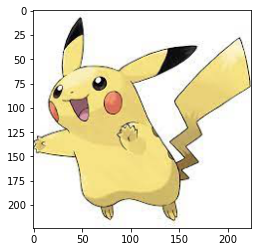

In [19]:
plt.imshow(train_pikachu[0]);

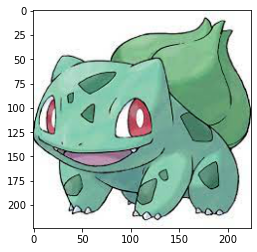

In [20]:
plt.imshow(train_esanghashi[0]);

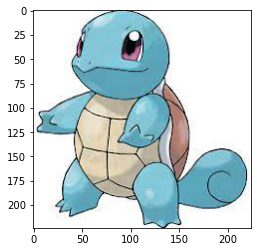

In [21]:
plt.imshow(train_ggobuki[0]);

In [22]:
# 문제 데이터 생성
X = np.concatenate([train_pikachu, train_esanghashi,train_ggobuki])

In [23]:
X.shape

(1199, 224, 224, 3)

In [26]:
# 정답 데이터 생성 ( 피카츄(0), 이상해씨(1) , 꼬부기(2) 순)
# 인위적으로 정답 데이터를 만듬
y = np.array([0]*399 + [1]*400 +[2]*400)

In [27]:
y.shape

(1199,)

In [32]:
# 문제 정답 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state=44
                                                   )
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 224, 224, 3)
(240, 224, 224, 3)
(959,)
(240,)


 #### NPZ파일 변환시키기
  - NPZ : NumPy Zip

In [33]:
np.savez_compressed('pokemon.npz',
                    X_train = X_train,
                    X_test = X_test,
                    y_train = y_train,
                    y_test = y_test
                   )